## <span>LOGISTIC REGRESSION FOR PREDICTIVE MODELING</span>

### **Question**
Which customers are most likely to leave the telecom company, and why? What features are especially important in terms of customer churn?

### **Goals and Objectives**
Stakeholders in the organization will benefit from knowing with some certainty which customers are more 
likely to churn and which aren't. Stakeholders will be able to get answers to their inquiries and make better business 
decisions as a consequence of statistical analysis.

### **Assumptions**

The Bernoulli Distribution is used in logistic regression, where the predicted values are limited to a range of nominal values such as "Yes" or "No".
Logistic Regression forecasts the likelihood of specific events rather than the outcome itself. Logistic Regression is the logarithm of one's chances of success.

This project will be supported by Jupyter notebook, and the analysis will be done in Python. Python is a programming language that focuses on readability and cross-platform compatibility. It is fast and well-suited for large-scale machine learning deployment as compared to other programming languages like R.

### **Explanation on why logistic regression is an appropriate technique**

The categorical dependent variable is predicted using a set of independent variables in Logistic Regression. We find the S-curve by which we may classify the data and forecast the values of categorical variables. We want to determine the likelihood of customer turnover for certain consumers based on a collection of independent variables. We will obtain a better understanding of increasing churn probability by understanding how the predictor variables affect the overall target variable.

### **Data Goals**

1. Import the dataset into Python using the read csv command, as well as the necessary libraries for the analysis.
2. To have a better grasp of the dataset, look at the data structure. Find outliers through the use of boxplots and impute missing data with either mean, median or mode. 
3. The dependent variable will be "Churn", which will also be the categorical binary target variable. Other category predictor factors were discovered in the dataset after further inspection. All of the categorical variables were "Techie", "Contract", "Port modem", "Tablet", "InternetService", "Phone", "Multiple", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV" and "StreamingMovies". 
4. Finally, discrete ordinal predictor variables from "Item 1" to "Item 8" from the dataset were renamed according to the data dictionary inorder for the reader to better understand the features.


### **Summary Statistics**

There were 50 columns and 10,000 records in the imported dataset. User IDs and demographic category variables were eliminated. Before doing the regression analysis, all other binary categorical variables were encoded as 1 or 0. There were 33 numerical independent predictor variables and 1 dependent variable remained at this point (34 total columns). Prior to import, the churn dataset had been cleaned, and there appeared to be no null or missing values in the dataset. Although "Outage sec per week" and "MonthlyCharge" appear to have normal distributions, "Bandwidth GB Year" and "Tenure" appear to have bimodal distributions. The average age of this dataset is 53.08 years, with a standard deviation of 20.70. The average household income in the United States is $39806.93. A particular household had a maximum of ten children. The average annual consumption of gigabytes per family was 3,392 GB. The target variable, "Churn," will be the dependant variable for this analysis.

### **Prepared Dataset**

In [33]:
churns.to_csv('newlogisticchurn.csv')
newchurns = pd.read_csv('newlogisticchurn.csv')

In [34]:
newchurns.shape

(10000, 35)

### **Initial Logistic Regression Model**

In [36]:
from statsmodels.formula.api import logit


In [38]:
#Logistic Regression Results (Dummy variables are not included for the predictor variables)
newchurns['intercept'] = 1
churn_rate = sm.Logit(newchurns['EncodedChurn'], newchurns[['Children', 'Age', 'Income', 
'Outage_sec_perweek', 'Email', 'Contacts','Yearly_equip_failure', 'Tenure', 'Bandwidth_GB_Year', 'MonthlyCharge',
'TimelyResponse', 'TimelyFixes', 'TimelyReplacements', 'Reliability',
'Options', 'RespectfulResponse', 'CourteousExchange', 'ActiveListening', 'intercept']]).fit()

print(churn_rate.summary())

Optimization terminated successfully.
         Current function value: 0.319573
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           EncodedChurn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9981
Method:                           MLE   Df Model:                           18
Date:                Wed, 20 Oct 2021   Pseudo R-squ.:                  0.4473
Time:                        18:10:48   Log-Likelihood:                -3195.7
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                -0.0980      0.016     -6.318      0.000      -0.128      -0.068

In [39]:
#All predictor variables are included in the Logistic Regression Analysis (Includes the dummy variables)
newchurns['intercept'] = 1
churn_rate = sm.Logit(newchurns['EncodedChurn'], newchurns[['Children', 'Age', 'Income', 
'Outage_sec_perweek', 'Email', 'Contacts','Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
'TimelyResponse', 'TimelyFixes', 'TimelyReplacements', 'Reliability',
'Options', 'RespectfulResponse', 'CourteousExchange', 'ActiveListening',
'EncodedGender', 'Bandwidth_GB_Year', 'EncodedTechie', 'EncodedContract',
'EncodedPort_modem', 'EncodedTablet', 'EncodedInternetService',
'EncodedPhone', 'EncodedMultiple', 'EncodedOnlineSecurity',
'EncodedOnlineBackup', 'EncodedDeviceProtection', 'EncodedTechSupport',
'EncodedStreamingTV', 'EncodedStreamingMovies',
'EncodedPaperlessBilling', 'intercept']]).fit()

print(churn_rate.summary())

Optimization terminated successfully.
         Current function value: 0.277912
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           EncodedChurn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9966
Method:                           MLE   Df Model:                           33
Date:                Wed, 20 Oct 2021   Pseudo R-squ.:                  0.5194
Time:                        18:12:59   Log-Likelihood:                -2779.1
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Children                   -0.2835      0.051     -5.581      0.000      -0.383   

### **Initial Logistic Regression Model Equation**

According to the table above, psuedo R squared value increased from .4473 to.5194 after the dummy variables were added to the continuous variables. In this case, the model with the larger pseudo R-squared (**when encoded categorical values were included**) is the one that best predicts the outcome.
y = -4.06 + -0.28*X<sub>1</sub> + 0.0314*X<sub>2</sub> + 0*X<sub>3</sub> + -0.0040*X<sub>4</sub> + -0.0034*X<sub>5</sub> + 0.0464*X<sub>6</sub>+ -0.0340*X<sub>7</sub> + -0.8415*X<sub>8</sub> + 0.0029*X<sub>9</sub> + -0.0099*X<sub>10</sub> -0.0103*X<sub>11</sub> + 0.0191*X<sub>12</sub> + -0.0425*X<sub>13</sub> + -0.0374*X<sub>14</sub> -0.0052*X<sub>15</sub> + -0.0292*X<sub>16</sub> + 0.003*X<sub>17</sub> -0.4064*X<sub>18</sub> + 0.0091*X<sub>19</sub> + .8439*X<sub>20</sub> + -2.1030*X<sub>21</sub> + 0.0996*X<sub>22</sub> -0.0451*X<sub>23</sub> + -2.7222*X<sub>24</sub> + -0.2121*X<sub>25</sub> + 0.4999*X<sub>26</sub> -0.8800*X<sub>27</sub> + -0.2932*X<sub>28</sub> + -.4440*X<sub>29</sub> + .1500*X<sub>30</sub> + 0.0875*X<sub>31</sub> + 0.6765*X<sub>32</sub> + 0.0908*X<sub>33</sub> 

### **Justification for Model Reduction**

One model selection strategy is the **backward-elimination strategy**. The approach begins with a model that incorporates all possible predictor variables. Variables are excluded from the model ONE AT A TIME until only those with statistically significant p values remain (until the P values are smaller than the alpha value) (0.05)
1. ActiveListening has the highest p value. Delete the "ActiveListening" column and refit the model
2. Continue the process until other variables with p values greater than the alpha value (0.05) needs to be removed. 
3. After refitting the model, we can see that EncodedTechSupport and MonthlyCharge still needs to be removed. After the removal process, see if there are any more p values that are greater than the alpha value.
4. Run the seaborn heatmap to see any correlation

### **Reduced Regression Model**

In [45]:

#Includes the refined predictor variables. (Part 1)
newchurns['intercept'] = 1
churn_rate = sm.Logit(newchurns['EncodedChurn'], newchurns[['Children', 'Age', 'Tenure', 'MonthlyCharge',
'EncodedGender', 'Bandwidth_GB_Year', 'EncodedTechie', 'EncodedContract',
'EncodedInternetService','EncodedMultiple', 'EncodedOnlineSecurity',
'EncodedOnlineBackup', 'EncodedDeviceProtection', 'EncodedTechSupport', 'EncodedStreamingMovies','intercept']]).fit()

print(churn_rate.summary())

Optimization terminated successfully.
         Current function value: 0.278578
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           EncodedChurn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Wed, 20 Oct 2021   Pseudo R-squ.:                  0.5182
Time:                        19:15:27   Log-Likelihood:                -2785.8
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Children                   -0.2953      0.025    -11.867      0.000      -0.344   

In [46]:
newchurns['intercept'] = 1
churn_rate = sm.Logit(newchurns['EncodedChurn'], newchurns[['Children', 'Age', 'Tenure',
'EncodedGender', 'Bandwidth_GB_Year', 'EncodedTechie', 'EncodedContract',
'EncodedInternetService','EncodedMultiple', 'EncodedOnlineSecurity',
'EncodedOnlineBackup', 'EncodedDeviceProtection', 'EncodedStreamingMovies','intercept']]).fit()

print(churn_rate.summary())

Optimization terminated successfully.
         Current function value: 0.278942
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           EncodedChurn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Wed, 20 Oct 2021   Pseudo R-squ.:                  0.5176
Time:                        19:18:27   Log-Likelihood:                -2789.4
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Children                   -0.3118      0.019    -16.152      0.000      -0.350   

**Reduced Logistic Model Regression Equation**

y = -4.381 + -0.311*X<sub>1</sub> + 0.0344*X<sub>2</sub> + -0.9144*X<sub>3</sub> + -0.4591*X<sub>4</sub> + -0.0100*X<sub>5</sub> + 0.843*X<sub>6</sub>+ -2.0981*X<sub>7</sub> + -3.1186*X<sub>8</sub> + 0.5248*X<sub>9</sub> + -0.9319*X<sub>10</sub> -0.3146*X<sub>11</sub> -0.4808*X<sub>12</sub> + 0.6269*X<sub>13</sub>

### **Comparision of different models**

Despite halving the number of variables, the second model still explains 51.76 percent of variance, as proven by the pseudo R. The sign of the coefficient reflects whether the link between each independent and dependent variable is positive or negative. A positive coefficient suggests that as the value of the independent variable grows, the mean of the dependent variable tends to climb as well. A negative coefficient suggests that as the independent variable rises, the dependent variable tends to fall.
For example, the longer a consumer stays with a company or whether they have a device protection add-on and internet service, the less likely they are to churn. Stakeholders can improve customer experience and help customers grasp everything the firm is providing them by understanding the inverse correlations between certain inverse variables and the target variable.



**Development of Confusion Matrix**

In [ ]:
dataset = pd.read_csv('newlogisticchurn.csv')

In [55]:
#Define x and y
x = dataset.drop(['EncodedChurn', 'Unnamed: 0'], axis = 1).values
y = dataset['EncodedChurn'].values

In [56]:
print(x)

[[0.000000e+00 6.800000e+01 2.856199e+04 ... 0.000000e+00 1.000000e+00
  1.000000e+00]
 [1.000000e+00 2.700000e+01 2.170477e+04 ... 1.000000e+00 1.000000e+00
  1.000000e+00]
 [4.000000e+00 5.000000e+01 9.609570e+03 ... 0.000000e+00 1.000000e+00
  1.000000e+00]
 ...
 [1.000000e+00 4.800000e+01 4.598343e+04 ... 0.000000e+00 0.000000e+00
  1.000000e+00]
 [1.000000e+00 3.900000e+01 1.666758e+04 ... 1.000000e+00 1.000000e+00
  1.000000e+00]
 [1.000000e+00 2.800000e+01 9.020920e+03 ... 0.000000e+00 1.000000e+00
  1.000000e+00]]


In [57]:
print(y)

[0 1 0 ... 0 0 0]


In [58]:
#Split the dataset in training set and test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [71]:
from sklearn.linear_model import LogisticRegression
classify= LogisticRegression(random_state = 0)
classify.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [72]:
#Predict the test set results
y_pred = classify.predict(x_test)

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1962  239]
 [ 270  529]]


In [79]:
#Extract information from the confusion matrix
TN = cm[0,0] #TrueNegative
TP = cm[1,1] #TruePositive
FN = cm[1,0] #FullNegative 
FP = cm[0,1] #FullPositive


In [75]:
# Calculate and print the accuracy
accuracy = (TN + TP) / (TN + FN + FP + TP)
print("accuracy", accuracy)
# Calculate and print the sensitivity
sensitivity = TP / (TP + FN)
print("sensitivity", sensitivity)
# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity", specificity)


accuracy 0.7643448910708807
sensitivity 0.5
specificity 0.8914129940935939


<AxesSubplot:>

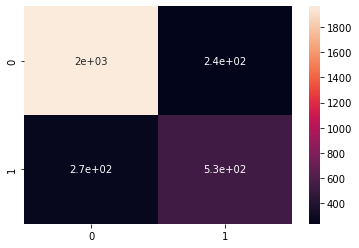

In [76]:
y_predict_test = classify.predict(x_test)
cm2 = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm2, annot=True)

**Classification Report**


In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))


              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2201
           1       0.69      0.66      0.68       799

    accuracy                           0.83      3000
   macro avg       0.78      0.78      0.78      3000
weighted avg       0.83      0.83      0.83      3000



### **Results**
Reduced Logistic Regression Equation Model: y = -4.381 + -0.311*X<sub>1</sub> + 0.0344*X<sub>2</sub> + -0.9144*X<sub>3</sub> + -0.4591*X<sub>4</sub> + -0.0100*X<sub>5</sub> + 0.843*X<sub>6</sub>+ -2.0981*X<sub>7</sub> + -3.1186*X<sub>8</sub> + 0.5248*X<sub>9</sub> + -0.9319*X<sub>10</sub> -0.3146*X<sub>11</sub> -0.4808*X<sub>12</sub> + 0.6269*X<sub>13</sub>

### **Recommendations**
It's critical for marketers and decision-makers to understand that some of our predictor variables and our goal variable, Churn, are inversely related. This means that as a consumer subscribes to more services from the organization, they are less likely to leave or churn.
Clearly, it is in the company's best interests to provide additional services to customers and improve their overall experience by supporting them in understanding all of the options available to them as a subscriber, not just mobile phone service. 
Individuals with contracts are less likely to leave the organization, thus we propose spending more on marketing efforts for contract usage and internet services.
Also, because there is a direct linear relationship between bandwidth used annually and telecom company tenure, it makes sense to recommend that the company use all of its marketing and customer service resources to keep the customers it has acquired, as the longer they stay with the company, the more bandwidth they tend to use. This would entail making sure that client issues are quickly resolved and that the equipment provided is of high quality in order to limit the frequency of equipment replacements. Clients that stay with the telecom firm for more than 5 years may be eligible for a discount.
The more time a customer spends using data, the more likely bandwidth limits may be raised. Stakeholders must emphasize the client's needs and develop their resources in order for the customer to stay with the company for as long as feasible.



### **Sources for Third-Party Code**
* Pitsillides91. (n.d.). Python-Tutorials/Introduction to ML - Logistic Regression Example at master · Pitsillides91/Python-Tutorials. Retrieved from https://github.com/Pitsillides91/Python-Tutorials/tree/master/Introduction to ML - Logistic Regression Example
* D. (2019, September 26). How to Perform Logistic Regression in Python(Step by Step). Data Science. https://www.datarmatics.com/data-science/how-to-perform-logistic-regression-in-pythonstep-by-step/

### **Sources**

* StatQuest: Logistic Regression. (2018, March 5). YouTube. https://www.youtube.com/watch?v=yIYKR4sgzI8&ab_channel=StatQuestwithJoshStarmer
* Statistics 101: Logistic Regression, An Introduction. (2015, March 9). YouTube. https://www.youtube.com/watch?v=zAULhNrnuL4&ab_channel=BrandonFoltz
